In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#讀A用dfA存
import pandas as pd
import os
dir = '/content/gdrive/MyDrive/racedata/graydata/GrayA'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        #print(filename)
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':
                print(os.path.split(dirname))
                label.append(os.path.split(dirname)[1][0])
                path.append(os.path.join(dirname,filename))
                print(os.path.join(dirname,filename))
dfA = pd.DataFrame(columns = ['path','label'])
dfA['path'] = path
dfA['label'] = label

串流輸出內容已截斷至最後 5000 行。
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20200308105101_8SSB20N60318H1DG035057Y_R1087_1_SolderLight.png
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20190919090033_8SSB20N60110H1DG99B00F5_R1124_1_S.png
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20200318064733_8SSB20N60318H1DG03E018J_R1154_1_SolderLight.png
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20191112173355_8SSB20N60323H1DG9B8002Y_R697_1_SolderLight.png
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20200321135244_8SSB20N60116H1DG03H01AA_R176_1_SolderLight.png
('/content/gdrive/MyDrive/racedata/graydata/GrayA', '3')
/content/gdrive/MyDrive/racedata/graydata/GrayA/3/20191114192942_8SSB20N60323H1DG9BA

In [3]:
#讀B用dfB存
import pandas as pd
import os
dir = '/content/gdrive/MyDrive/racedata/graydata/GrayB'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        #print(filename)
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':
                print(os.path.split(dirname))
                label.append(os.path.split(dirname)[1][0])
                path.append(os.path.join(dirname,filename))
                print(os.path.join(dirname,filename))
dfB = pd.DataFrame(columns = ['path','label'])
dfB['path'] = path
dfB['label'] = label

('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200222044818_R970_1.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200504150301_8SSB20N60289H1DG04T01MP_R2009_1_view53.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200223150214_R853_1.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20190904063111_R26.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200504230945_8SSB20N60289H1DG04T00S6_R988_1_view51.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20191111193431_8SSB20N60289H1DG9B9086G_R723_1_view12.png
('/content/gdrive/MyDrive/racedata/graydata/GrayB', '0')
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/2020

In [4]:
#check
dfA['label'] = dfA['label'].astype('category')
dfA['label'].value_counts()

0    7182
4    1824
1    1754
3     836
7     192
6     113
5      59
2      40
Name: label, dtype: int64

In [5]:
#check
dfB['label'] = dfB['label'].astype('category')
dfB['label'].value_counts()

0    130
7     10
6     10
5     10
4     10
3     10
2     10
1     10
Name: label, dtype: int64

In [6]:
#grayB資料分割
from sklearn.model_selection import train_test_split
train_dataB, test_dataB = train_test_split(dfB, random_state=42, test_size=0.5)
print(train_dataB.shape)
print(test_dataB.shape)

(100, 2)
(100, 2)


In [7]:
#合併訓練驗證資料
df3=pd.concat([dfA,train_dataB],keys=['label','path'])
df3['label'] = df3['label'].astype('category')
df3['label'].value_counts()

0    7244
4    1829
1    1759
3     842
7     197
6     119
5      64
2      46
Name: label, dtype: int64

In [8]:
#import
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np  
import itertools
import json
import os

im_height = 224
im_width = 224
batch_size = 64
epochs = 100

# 创建保存模型的文件夹
if not os.path.exists("save_weights"):
    os.makedirs("save_weights")


# 定义训练集图像生成器，并进行图像增强
train_image_generator = ImageDataGenerator( rescale=1./255, # 归一化
                                            validation_split=0.2,
                                            )
test_image_generator=ImageDataGenerator( rescale=1./255, # 归一化
                                            )
                                            
# 使用图像生成器从文件夹train_dir中读取样本，对标签进行one-hot编码
train_data_gen = train_image_generator.flow_from_dataframe(dataframe=df3, #从训练集路径读取图片
                                                           batch_size=batch_size, #一次训练所选取的样本数
                                                           x_col='path',
                                                           y_col='label',
                                                           class_mode='categorical',
                                                           subset= "training",
                                                           color_mode='rgb',
                                                           target_size=(224,224)
                                                           ) 
              
total_train = train_data_gen.n 

# 使用图像生成器从验证集validation_dir中读取样本
val_data_gen = train_image_generator.flow_from_dataframe(dataframe=df3,
                                                         batch_size=batch_size, #一次训练所选取的样本数
                                                         x_col='path',
                                                         y_col='label',
                                                         class_mode='categorical',#one-hot编码
                                                         subset= "validation",
                                                         color_mode='rgb',
                                                         target_size=(224,224)
                                                         ) 

test_data_gen=test_image_generator.flow_from_dataframe(dataframe=test_dataB,
                                                       x_col='path',
                                                       y_col='label',
                                                       class_mode='categorical',#one-hot编码
                                                       batch_size=batch_size, #一次训练所选取的样本数
                                                       color_mode='rgb',
                                                       shuffle=False,
                                                       target_size=(224,224)
                                                       )
                                                       
                                                              
# 验证集样本数      
total_val = val_data_gen.n


Found 9680 validated image filenames belonging to 8 classes.
Found 2420 validated image filenames belonging to 8 classes.
Found 100 validated image filenames belonging to 8 classes.


In [9]:
#使用tf.keras.applications中的DenseNet121网络，并且使用官方的预训练模型
covn_base = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3))
covn_base.trainable = True

#冻结前面的层，训练最后5层
for layers in covn_base.layers[:-5]:
    layers.trainable = False
    
#构建模型    
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())  #加入全局平均池化层
model.add(tf.keras.layers.Dense(512,activation='relu'))  #添加全连接层
model.add(tf.keras.layers.Dropout(rate=0.5))  #添加Dropout层，防止过拟合
model.add(tf.keras.layers.Dense(8,activation='softmax'))  #添加输出层 8個類別
model.summary()   #打印每层参数信息 

#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #使用adam优化器，学习率为0.0001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #交叉熵损失函数
              metrics=["accuracy"]) #评价函数


29097984/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4104      
Total params: 7,566,408
Trainable params: 567,816
Non-trainable params: 6,998,592
_________________________________________________________________


In [10]:
#回调函数1:学习率衰减
reduce_lr = ReduceLROnPlateau(
                                monitor='val_loss', #需要监视的值
                                factor=0.1,  #学习率衰减为原来的1/10
                                patience=2,  #当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发
                                #mode='auto', #当监测值为val_acc时，模式应为max，当监测值为val_loss时，模式应为min，在auto模式下，评价准则由被监测值的名字自动推断
                                verbose=1 #如果为True，则为每次更新输出一条消息，默认值:False
                             )
#回调函数2:保存最优模型
checkpoint = ModelCheckpoint(
                                filepath='./save_weights/myDenseNet121.ckpt', #保存模型的路径
                                monitor='val_acc', #需要监视的值
                                save_weights_only=False, #若设置为True，则只保存模型权重，否则将保存整个模型（包括模型结构，配置信息等）
                                save_best_only=False, #当设置为True时，监测值有改进时才会保存当前的模型
                                #mode='auto', #当监测值为val_acc时，模式应为max，当监测值为val_loss时，模式应为min，在auto模式下，评价准则由被监测值的名字自动推断
                                period=1 #CheckPoint之间的间隔的epoch数
                            )

In [11]:
#trainning
history = model.fit(x=train_data_gen,   #输入训练集
                    steps_per_epoch=total_train // batch_size, #一个epoch包含的训练步数
                    epochs=100, #训练模型迭代次数
                    validation_data=val_data_gen,  #输入验证集
                    validation_steps=total_val // batch_size, #一个epoch包含的训练步数
                    callbacks=[checkpoint, reduce_lr]) #执行回调函数
                    
#保存训练好的模型权重                    
model.save_weights('./save_weights/myNASNetMobile.ckpt',save_format='tf') 

# 记录训练集和验证集的准确率和损失值
history_dict = history.history
train_loss = history_dict["loss"] #训练集损失值
train_accuracy = history_dict["accuracy"] #训练集准确率
val_loss = history_dict["val_loss"] #验证集损失值
val_accuracy = history_dict["val_accuracy"] #验证集准确率

Epoch 1/100
151/151 [==============================] - 3195s 21s/step - loss: 0.8060 - accuracy: 0.7582 - val_loss: 1.0794 - val_accuracy: 0.6419
INFO:tensorflow:Assets written to: ./save_weights/myDenseNet121.ckpt/assets
Epoch 2/100
151/151 [==============================] - 28s 187ms/step - loss: 0.4438 - accuracy: 0.8676 - val_loss: 0.7862 - val_accuracy: 0.7272
INFO:tensorflow:Assets written to: ./save_weights/myDenseNet121.ckpt/assets
Epoch 3/100
151/151 [==============================] - 28s 184ms/step - loss: 0.3513 - accuracy: 0.8915 - val_loss: 0.8566 - val_accuracy: 0.7082
INFO:tensorflow:Assets written to: ./save_weights/myDenseNet121.ckpt/assets
Epoch 4/100
151/151 [==============================] - 28s 183ms/step - loss: 0.3018 - accuracy: 0.9045 - val_loss: 1.0750 - val_accuracy: 0.6508
INFO:tensorflow:Assets written to: ./save_weights/myDenseNet121.ckpt/assets

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/100
151/151 [==========

In [12]:
#model.save('Densenetmodel.h5')
model.save('/content/gdrive/MyDrive/racedata/mixDenseNetmodel_mixB.h5')

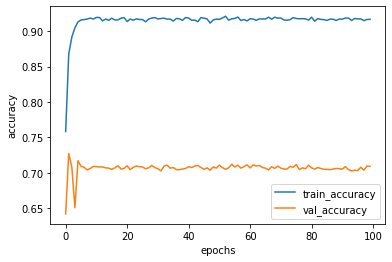

In [13]:
plt.figure()
plt.plot(range(100), train_accuracy, label='train_accuracy')
plt.plot(range(100), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Text(0, 0.5, 'loss')

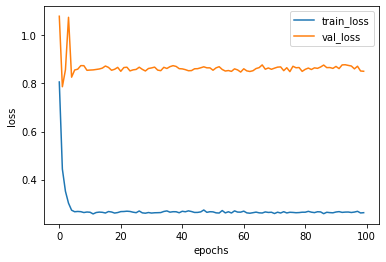

In [14]:
plt.figure()
plt.plot(range(100), train_loss, label='train_loss')
plt.plot(range(100), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

In [15]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
test_image=[]
for i in test_dataB['path']:
    print(i)
    img = image.load_img(i,target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
y = np.array(test_image)

/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20191110050743_8SSB20N60287H1DG9B60313_R1950_1_view51.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200422082416_8SSB20N60289H1DG04J049P_R947_1_view65.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200504131908_8SSB20N60289H1DG04T01X1_R349_1_view13.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/3/20200320104223_200366306100196_U33R40_1_view87.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200422082201_8SSB20N60289H1DG04J049W_R968_1_view58.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200225044813_R431_1.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200504203519_8SSB20N60289H1DG04T011R_R936_1_view50.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/5/20200224221944_R130_1.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/5/20190909223423_R723.png
/content/gdrive/MyDrive/racedata/graydata/GrayB/0/20200422044133_8SSB20N60289H1DG04J04P4_R7_1_view10.png
/content/gdrive/MyDrive/racedata

In [16]:
print(len(y))

100


In [17]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/gdrive/MyDrive/racedata/mixDenseNetmodel_mixB.h5')

0
1
2
3
4
5
6
7
Accuracy Score: 0.6


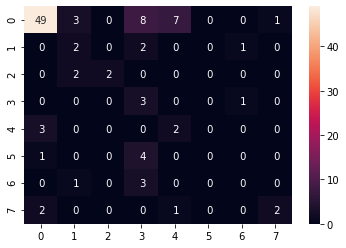

In [18]:
import seaborn as sns
import numpy as np
pred = model.predict(y)
pred=np.argmax(pred,axis=1)
pred_df=test_dataB.copy()
labels={}
for l,v in test_data_gen.class_indices.items():
    print(l)
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')